Zadanie wykonane przez grupę:
1.   Jakuba Korzeniowskiego 239436
2.   Michał Skurpel 239457






In [1]:
pip install -q tflite-model-maker

     |████████████████████████████████| 616 kB 5.2 MB/s 
     |████████████████████████████████| 1.1 MB 47.3 MB/s 
     |████████████████████████████████| 6.4 MB 33.2 MB/s 
     |████████████████████████████████| 3.4 MB 7.5 MB/s 
     |████████████████████████████████| 120 kB 48.7 MB/s 
     |████████████████████████████████| 840 kB 22.5 MB/s 
     |████████████████████████████████| 1.2 MB 43.2 MB/s 
     |████████████████████████████████| 596 kB 43.8 MB/s 
     |████████████████████████████████| 213 kB 49.4 MB/s 
     |████████████████████████████████| 87 kB 5.0 MB/s 
     |████████████████████████████████| 77 kB 2.1 MB/s 
     |████████████████████████████████| 1.1 MB 47.5 MB/s 
     |████████████████████████████████| 25.3 MB 1.8 MB/s 
     |████████████████████████████████| 352 kB 48.4 MB/s 
     |████████████████████████████████| 47.7 MB 65 kB/s 
     |████████████████████████████████| 99 kB 8.2 MB/s 
     |████████████████████████████████| 210 kB 62.8 MB/s 


In [2]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!wget https://gitlab.com/sykmer/sieci_konwolucyjne/-/raw/main/baza.zip

--2022-01-27 21:36:40--  https://gitlab.com/sykmer/sieci_konwolucyjne/-/raw/main/baza.zip
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23754703 (23M) [application/zip]
Saving to: ‘baza.zip’

baza.zip            100%[===================>]  22.65M  59.2MB/s    in 0.4s    

2022-01-27 21:36:40 (59.2 MB/s) - ‘baza.zip’ saved [23754703/23754703]



In [4]:
!mkdir /content/baza

In [5]:
!unzip baza

Archive:  baza.zip
   creating: baza/damskie/
  inflating: baza/damskie/035_black-white-kwadraty.jpg  
  inflating: baza/damskie/1 (1).jpeg  
  inflating: baza/damskie/1 (1).jpg  
  inflating: baza/damskie/1 (1).png  
  inflating: baza/damskie/1 (10).jpg  
  inflating: baza/damskie/1 (11).jpg  
  inflating: baza/damskie/1 (12).jpg  
  inflating: baza/damskie/1 (13).jpg  
  inflating: baza/damskie/1 (14).jpg  
  inflating: baza/damskie/1 (15).jpg  
  inflating: baza/damskie/1 (16).jpg  
  inflating: baza/damskie/1 (17).jpg  
  inflating: baza/damskie/1 (18).jpg  
  inflating: baza/damskie/1 (19).jpg  
  inflating: baza/damskie/1 (2).jpeg  
  inflating: baza/damskie/1 (2).jpg  
  inflating: baza/damskie/1 (2).png  
  inflating: baza/damskie/1 (20).jpg  
  inflating: baza/damskie/1 (21).jpg  
  inflating: baza/damskie/1 (22).jpg  
  inflating: baza/damskie/1 (23).jpg  
  inflating: baza/damskie/1 (24).jpg  
  inflating: baza/damskie/1 (25).jpg  
  inflating: baza/damskie/1 (26).jpg  
  in

In [6]:
image_path = '/content/baza'

In [7]:
data = DataLoader.from_folder(image_path)
train_data, rest_data = data.split(0.79)
validation_data, test_data = rest_data.split(0.5)

INFO:tensorflow:Load image with size: 354, num_label: 6, labels: damskie, kalosze, klapki, sportowe, wyjsciowe, zimowe.


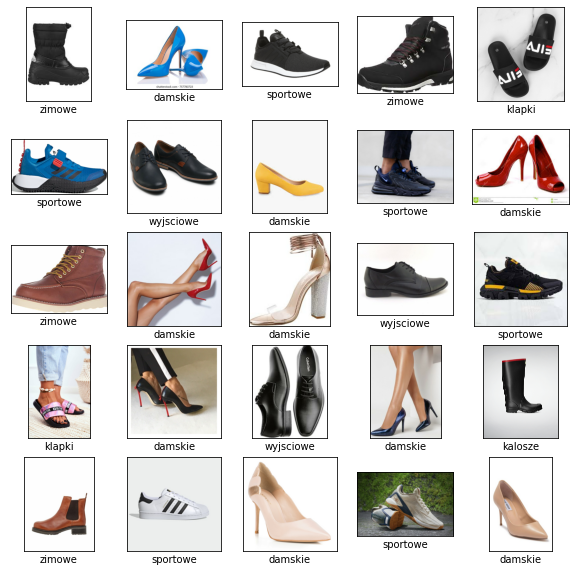

In [8]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [9]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs=50)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 6)                 7686      
                                                                 
Total params: 3,420,710
Trainable params: 7,686
Non-trainable params: 3,413,024
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
8/8 [==============================] - 19s 2s/step - loss: 1.8720 - accuracy: 0.2852 - val_loss: 1.7319 - val_accuracy: 0.2973
Epoch 2/50
8/8 [==============================] - 17s 2s/step - loss: 1.3473 - accuracy: 0.5781 - val_loss: 1.1436 - val_accuracy: 0.7027
Epoch 3/50
8/8 [==============================] - 16s 2s/step - loss: 0.9212 - accuracy: 0.8594 - val_loss: 0.8757 - val_accuracy: 0.8108
Epoch 4/50
8/8 [==============================] - 16s 2s/step - loss: 0.7417 - accuracy: 0.9023 - val_loss: 0.7652 - val_accuracy: 0.8378
Epoch 5/50
8/8 [==============================] - 16s 2s/step - loss: 0.6309 - accuracy: 0.9570 - val_loss: 0.7189 - val_accuracy: 0.8378
Epoch 6/50
8/8 [==============================] - 16s 2s/step - loss: 0.5926 - accuracy: 0.9609 - val_loss: 0.6970 - val_accuracy: 0.8919
Epoch 7/50
8/8 [==============================] - 16s 2s/step - loss: 0.5749 - accuracy: 0.9805 - val_loss: 0.6847 - val_accuracy: 0.8919
Epoch 8/50
8/8 [==================

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 6)                 7686      
                                                                 
Total params: 3,420,710
Trainable params: 7,686
Non-trainable params: 3,413,024
_________________________________________________________________


In [11]:
loss, accuracy = model.evaluate(test_data)

2/2 [==============================] - 3s 202ms/step - loss: 0.6237 - accuracy: 0.9211


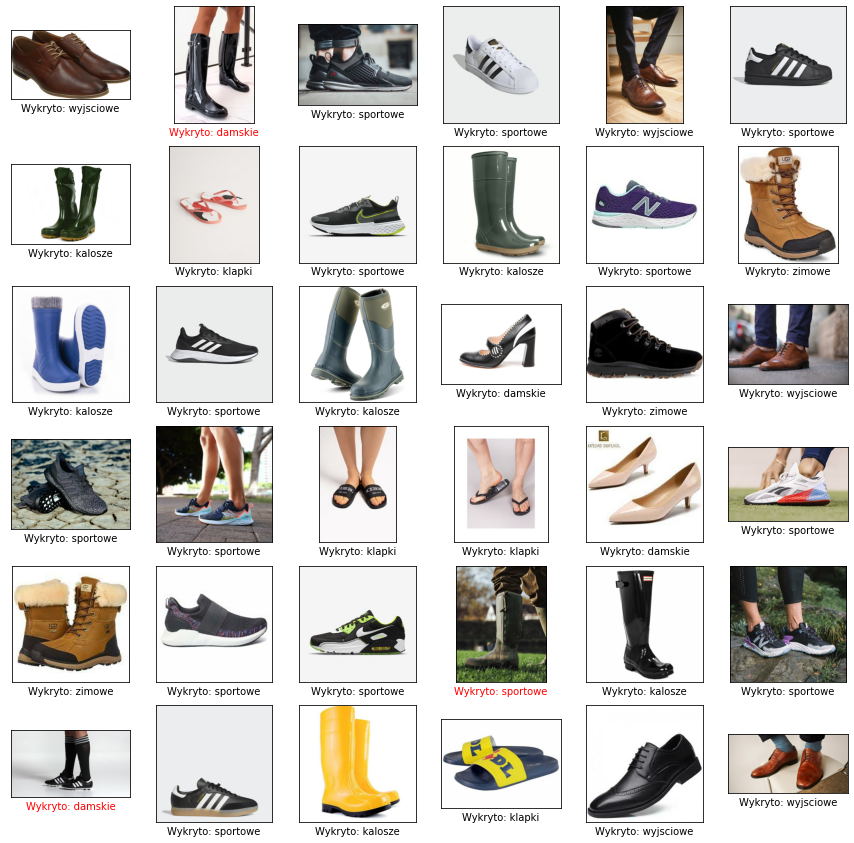

In [12]:
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(15, 15))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(36)):
  ax = plt.subplot(6, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Wykryto: %s' % predict_label)
plt.show()